<a href="https://colab.research.google.com/github/samhitakolichala/LINEAR_REGRESSION/blob/codespace-samhitakolichala-ominous-cod-564q4x9rg46hj7w/Copy_of_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset

In [2]:
dataset = pd.read_csv('Boston.csv')
X = dataset.iloc[:,1:14]
y = dataset.iloc[:,-1]

In [3]:
X

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [4]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [5]:
dataset.head()

Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [7]:
dataset.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [8]:
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)

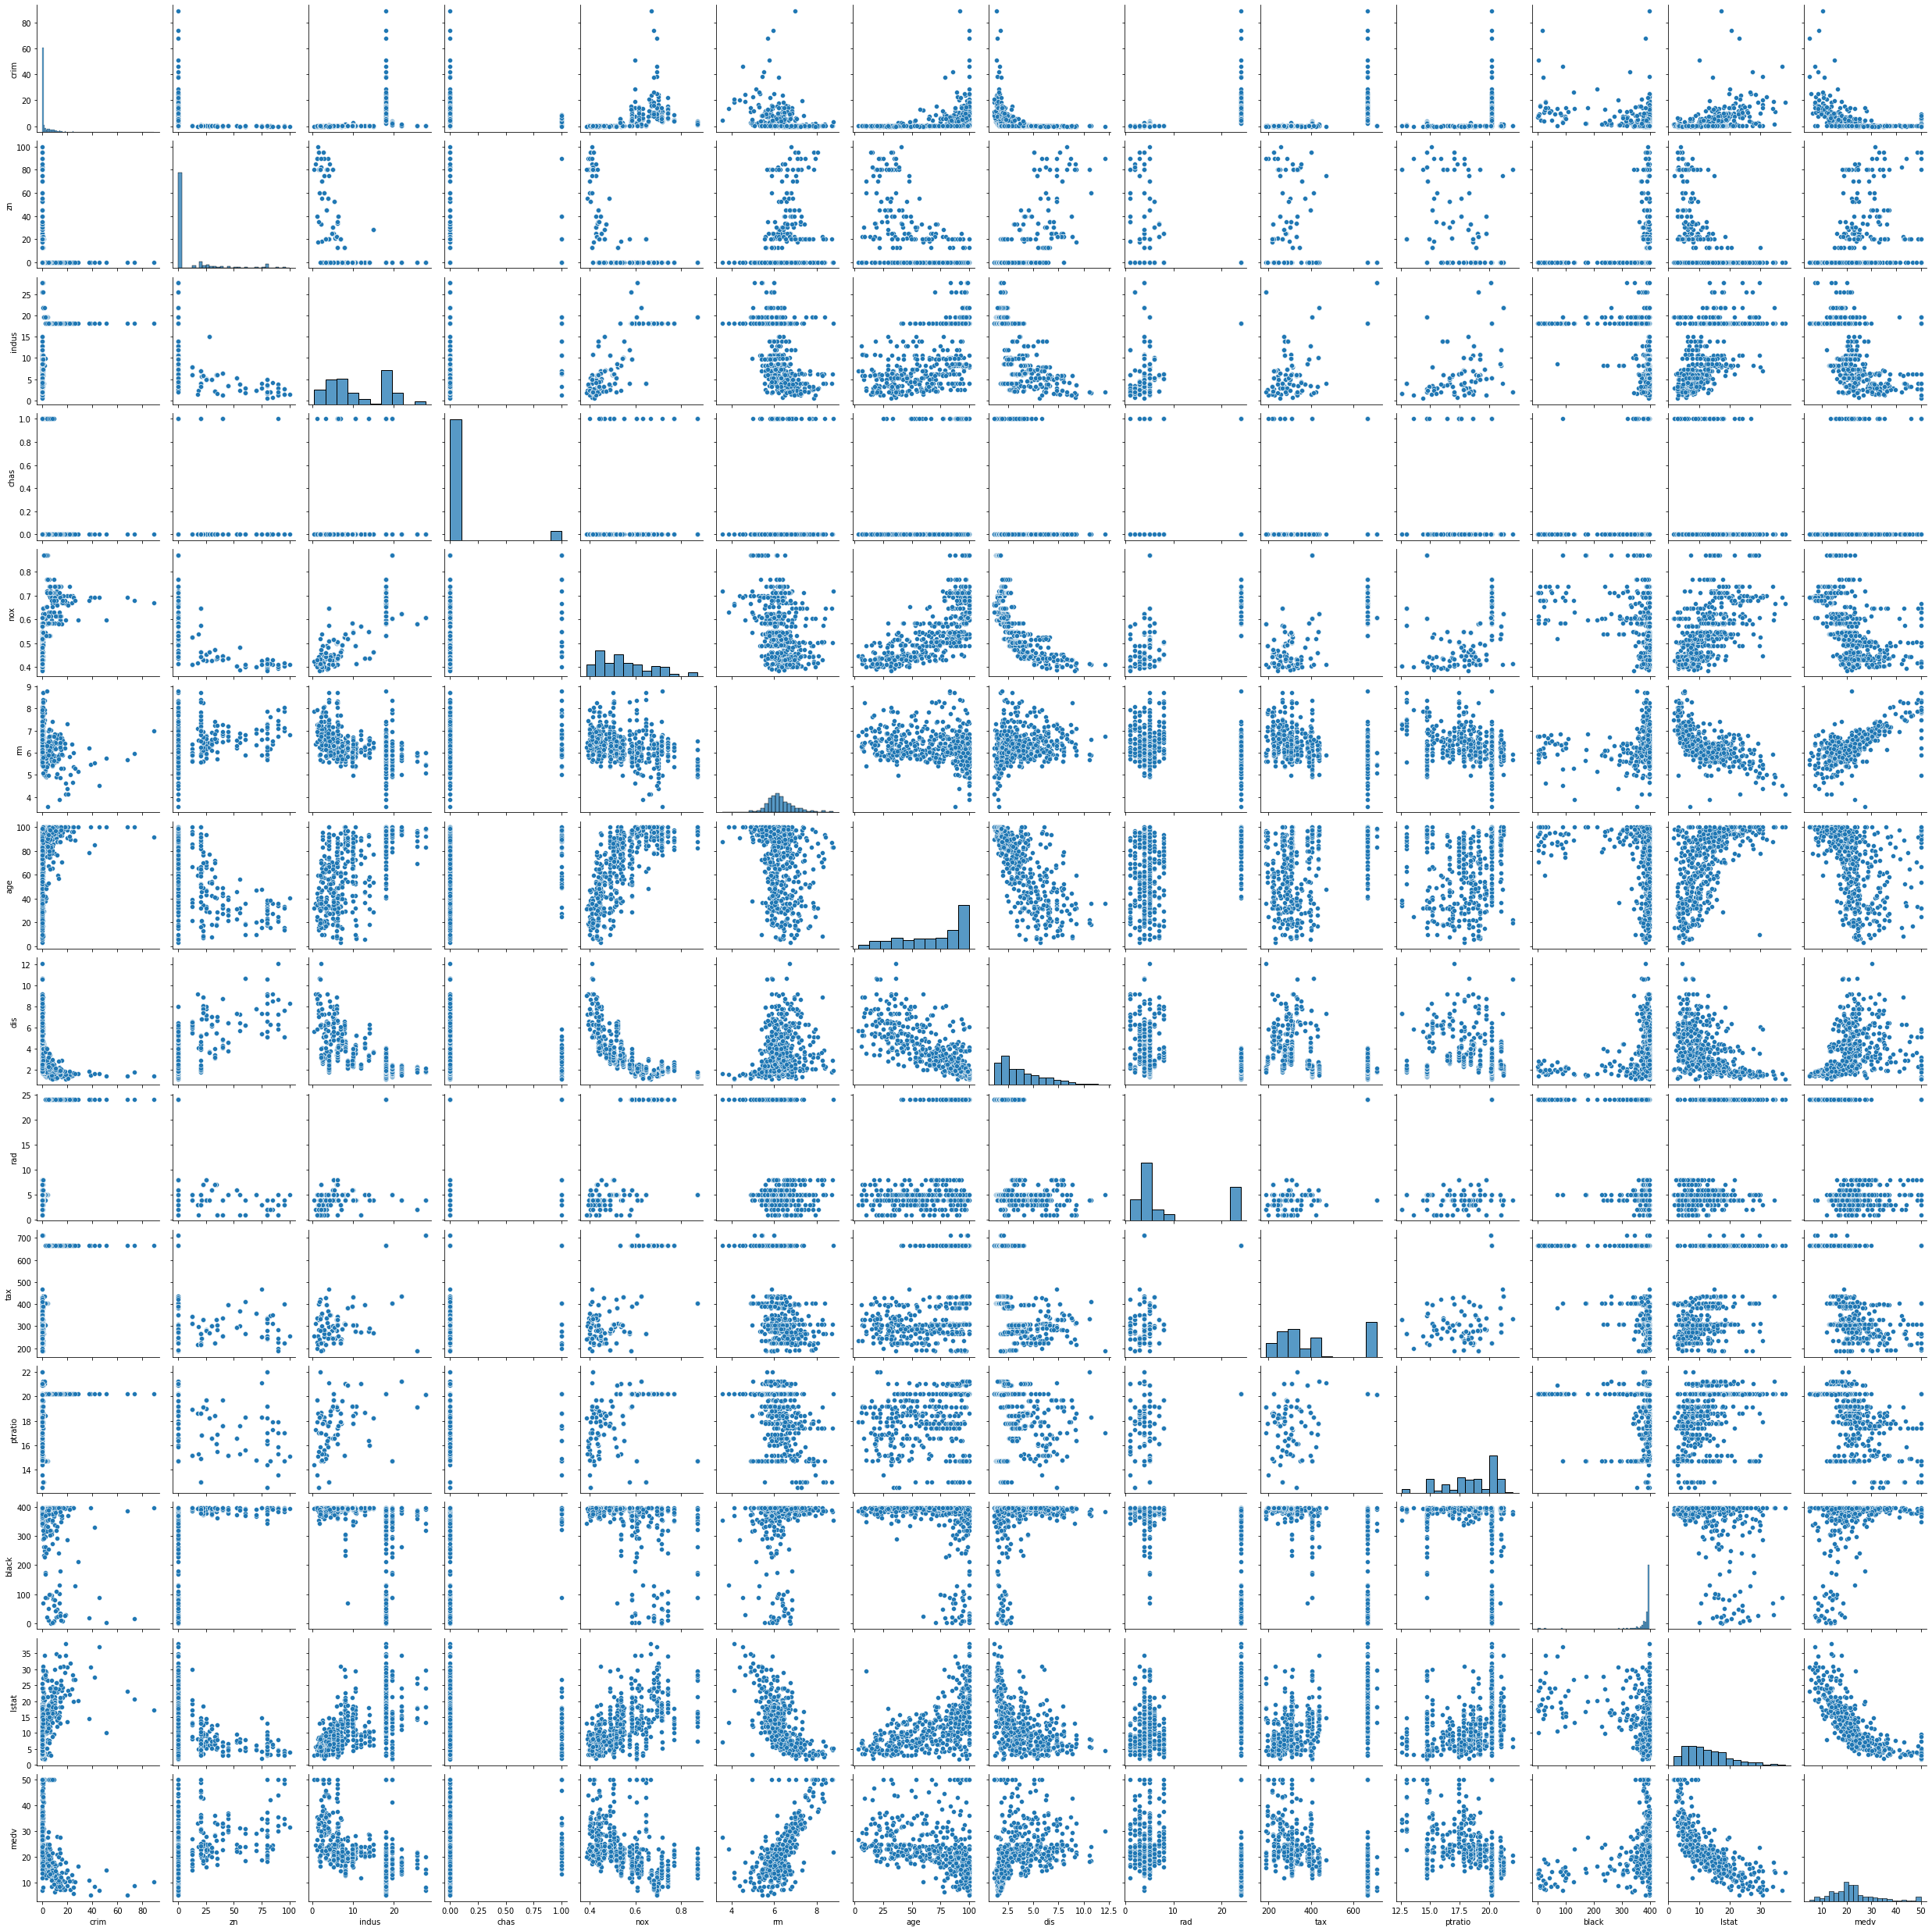

In [9]:
#A pairplot plot a pairwise relationships in a dataset
import seaborn as sns
sns.pairplot(dataset)

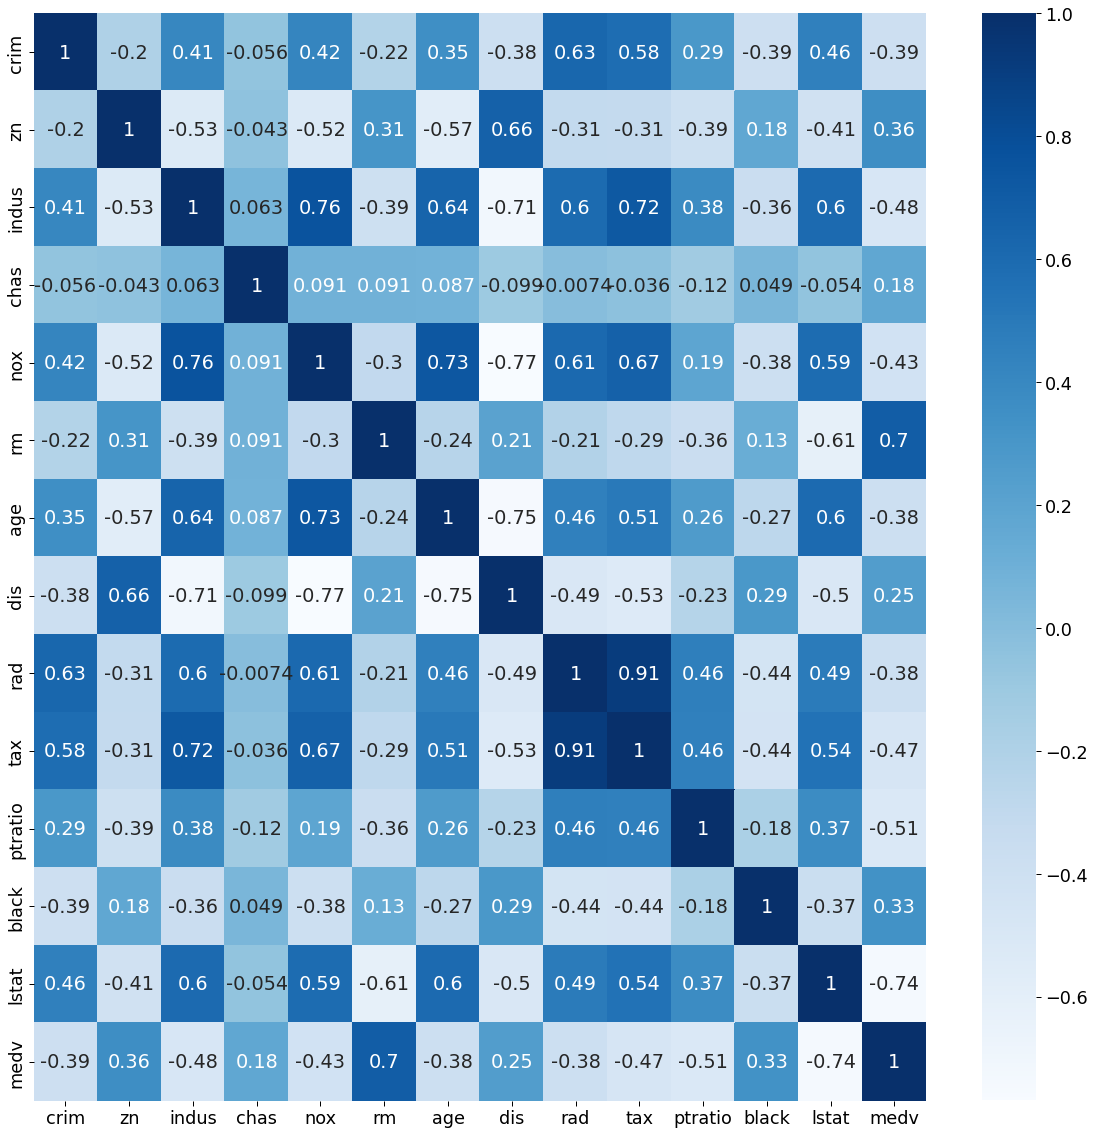

In [10]:
import seaborn as sns
corr = dataset.corr()


plt.figure(figsize=(20,20))
sns.set_context('paper',font_scale=2)


# Create a heatmap from the correlation matrix
sns.heatmap(corr, annot=True, cmap='Blues')

# Show the plot
plt.show()

there is high correlation between ( rm vs medv , zn vs medv )

there is high corr btwn indep.v vs indep.v ( lstat vs indus,lstat vs age ,rad vs crim , nox vs indus) 

To , check multicollinearity ( if 'VIF' is greater than '10' then these indep.v are highly correlated

In [11]:
X=dataset[['lstat','indus','age','rad','crim','nox']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data

feature
0   lstat
1   indus
2     age
3     rad
4    crim
5     nox

In [12]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

  feature        VIF
0   lstat   8.013383
1   indus   8.624377
2     age  16.396054
3     rad   4.851223
4    crim   2.019694
5     nox  16.348593


In [13]:
import statsmodels.api as sm
def model_summary(x,y):
    X = sm.add_constant(np.array(dataset[x]))
    model = sm.OLS(np.array(dataset[y]), X).fit()
    print(model.summary())

In [14]:
model_summary(['age','nox','crim','lstat','indus','rad'],'medv')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     107.4
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.36e-86
Time:                        14:09:43   Log-Likelihood:                -1630.4
No. Observations:                 506   AIC:                             3275.
Df Residuals:                     499   BIC:                             3304.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.6221      1.669     19.543      0.0

In [15]:
dataset.drop(['nox','crim','rad','lstat','indus'],axis=1,inplace=True)


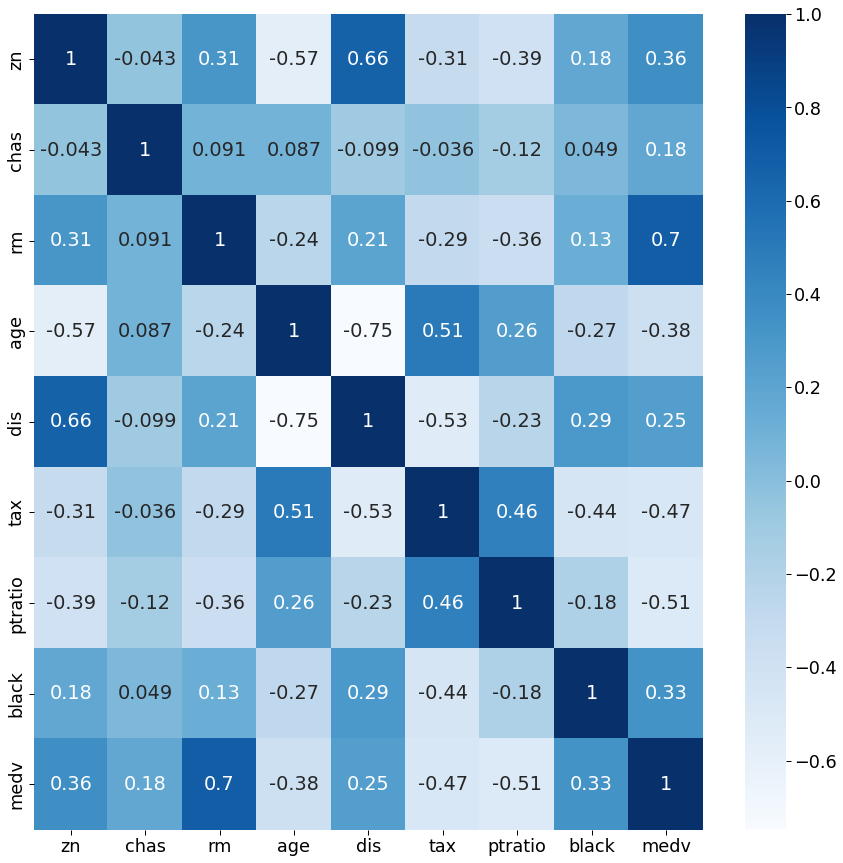

In [16]:
import seaborn as sns
corr = dataset.corr()


plt.figure(figsize=(15,15))
sns.set_context('paper',font_scale=2)


# Create a heatmap from the correlation matrix
sns.heatmap(corr, annot=True, cmap='Blues')

# Show the plot
plt.show()

In [17]:
import statsmodels.api as sm
def model_summary(x,y):
    X = sm.add_constant(np.array(dataset[x]))
    model = sm.OLS(np.array(dataset[y]), X).fit()
    print(model.summary())

In [18]:
model_summary(['black','zn','rm','dis'],'medv')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     159.1
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           9.26e-88
Time:                        14:09:44   Log-Likelihood:                -1632.8
No. Observations:                 506   AIC:                             3276.
Df Residuals:                     501   BIC:                             3297.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.4461      2.708    -13.830      0.0

In [19]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [20]:
#Training the Multiple Linear Regression model on the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
#Training set results

y_pred_tr=regressor.predict(X_train)

from sklearn.metrics import r2_score
r2_score(y_train, y_pred_tr)


0.5939482140358315

In [22]:
#Predicting the Test set results

y_pred_test = regressor.predict(X_test)
r2_score(y_test, y_pred_test)

0.4202679570423793

Validation tests for linear regression

1) Test for normality

In [23]:
 
##  Shapiro -wilk test , to check if the residuals are normally distributed or not

residuals=y_pred_test-y_test

from scipy import stats
stats.shapiro(residuals) 

# if 'p' - value is less than 0.05 (alpha) , that means the residuals are not distributed ' normally'



ShapiroResult(statistic=0.8494811654090881, pvalue=8.861105627033794e-09)

Conclusion  :- p-value is greater than 0.05 so, the residuals are normally distributed

2) DURBIN-WATSON test , To check for Autocorrelation 


In [24]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)

1.8366969728325822

CONCLUSION:- Since the value is 1.8 which is between the range of 1.5 to 2.5 means no autocorrelation 

3) BREUSHPAGAN -TEST , to check if heteroscedasticty is present

In [25]:
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(residuals,X_test)[1]

1.2089806352571308e-05

CONCLUSION:- Here, the p-value is greater than alpha(0.05) , which means that the data is homoscedatic

2nd-model

In [26]:
dataset

zn  chas     rm   age     dis  tax  ptratio   black  medv
0    18.0     0  6.575  65.2  4.0900  296     15.3  396.90  24.0
1     0.0     0  6.421  78.9  4.9671  242     17.8  396.90  21.6
2     0.0     0  7.185  61.1  4.9671  242     17.8  392.83  34.7
3     0.0     0  6.998  45.8  6.0622  222     18.7  394.63  33.4
4     0.0     0  7.147  54.2  6.0622  222     18.7  396.90  36.2
..    ...   ...    ...   ...     ...  ...      ...     ...   ...
501   0.0     0  6.593  69.1  2.4786  273     21.0  391.99  22.4
502   0.0     0  6.120  76.7  2.2875  273     21.0  396.90  20.6
503   0.0     0  6.976  91.0  2.1675  273     21.0  396.90  23.9
504   0.0     0  6.794  89.3  2.3889  273     21.0  393.45  22.0
505   0.0     0  6.030  80.8  2.5050  273     21.0  396.90  11.9

[506 rows x 9 columns]

In [27]:
X

lstat  indus   age  rad     crim    nox
0     4.98   2.31  65.2    1  0.00632  0.538
1     9.14   7.07  78.9    2  0.02731  0.469
2     4.03   7.07  61.1    2  0.02729  0.469
3     2.94   2.18  45.8    3  0.03237  0.458
4     5.33   2.18  54.2    3  0.06905  0.458
..     ...    ...   ...  ...      ...    ...
501   9.67  11.93  69.1    1  0.06263  0.573
502   9.08  11.93  76.7    1  0.04527  0.573
503   5.64  11.93  91.0    1  0.06076  0.573
504   6.48  11.93  89.3    1  0.10959  0.573
505   7.88  11.93  80.8    1  0.04741  0.573

[506 rows x 6 columns]

In [28]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

Evaluating-model performance

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics

print("MAE", metrics.mean_absolute_error(y_test, y_pred_test))
print("MSE", mean_squared_error(y_test, y_pred_test))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_test)))

MAE 4.908616306627354
MSE 47.20667533220499
RMSE 6.870711413835178


In [30]:
r2_score(y_train, y_pred_tr)

0.5939482140358315

In [31]:
r2_score(y_test, y_pred_test)

0.4202679570423793

Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics

print("MAE", metrics.mean_absolute_error(y_test, y_pred_test))
print("MSE", mean_squared_error(y_test, y_pred_test))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_test)))

MAE 4.908616306627354
MSE 47.20667533220499
RMSE 6.870711413835178


In [34]:
r2_score(y_train,y_pred_tr)

0.5939482140358315

In [35]:
r2_score(y_test, y_pred_test)

0.4202679570423793

Regularization :- to overcome the overfitting

Ridge Regression

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-2,1,2,3,4,5,6,7,8,9,10,15,20,25,30,42,51,53,55,60]}

ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)

ridge_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 0.01, 1, 2, 3, 4, 5, 6, 7, 8,
                                   9, 10, 15, 20, 25, 30, 42, 51, 53, 55, 60]},
             scoring='neg_mean_squared_error')

In [37]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 6}
-35.73451927757798


training

In [38]:
y_pred_tr_r= ridge_regressor.predict(X_train)

In [39]:
r2_score(y_train ,y_pred_tr_r)

0.5937106772383922

Test

In [40]:
y_pred_test_r=ridge_regressor.predict(X_test)


In [41]:
r2_score(y_test,y_pred_test_r)

0.41752344099022864

Lasso Regression

In [42]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-2,1,2,3,4,5,6,7,8,9,10,15,20,25,30,42,51,53,55,60]}

lasso_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 0.01, 1, 2, 3, 4, 5, 6, 7, 8,
                                   9, 10, 15, 20, 25, 30, 42, 51, 53, 55, 60]},
             scoring='neg_mean_squared_error')

In [43]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 6}
-35.73451927757798


Training

In [44]:
y_pred_tr_l= ridge_regressor.predict(X_train)

In [45]:
r2_score(y_train,y_pred_tr_l)

0.5937106772383922

Test

In [46]:
y_pred_test_l=lasso_regressor.predict(X_test)

In [47]:
r2_score(y_test,y_pred_test_l)

0.41752344099022864